In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import skimage
from skimage import io
import scipy as sp
import itertools as iter
from scipy import fft
import math
import time
import cv2

In [ ]:
#1. Radial Sinusoid and its Frequency Response:
#(a) Generate a radial sinusoid image of size M ×M using x(u, v) = cos((2πf0/M)×D(u, v)), where the
#    distance from centre D(u, v) = ((u − M/2)^2 + (v − M/2)^2)^(1/2) with the side length M = 500
#    and frequency f0 = 50.

def gen_img(f0,m):
  k = (2*(math.pi)*f0)/m
  img = np.arange(0,int(m/2))
  img1 = np.concatenate((np.flip(img), img[1:-1]), axis=0)
  img3, img4 = np.meshgrid(img1, np.transpose(img1))
  zs = np.sqrt(img3**2 + img4**2)
  x=np.cos(k*zs)
  return x

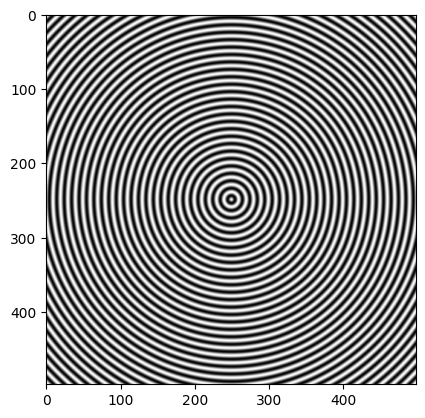

In [ ]:
f0 = 50
m=500
x = gen_img(f0,m)

plt.imshow(x, cmap="gray")


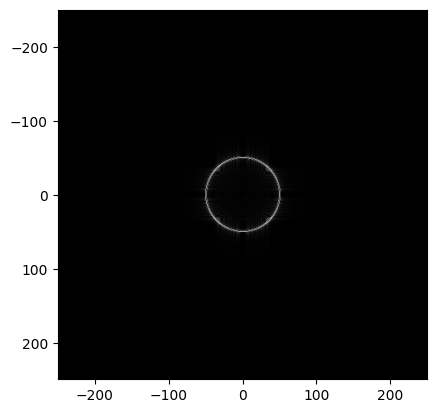

In [ ]:
f0 = 50
m=500
x = gen_img(f0,m)

x_dft = sp.fft.fft2(x)
x_dft = sp.fft.fftshift(x_dft)
plt.imshow((np.abs(x_dft)), cmap= "gray", extent=[-m/2,m/2-1, m/2-1, -m/2-1])

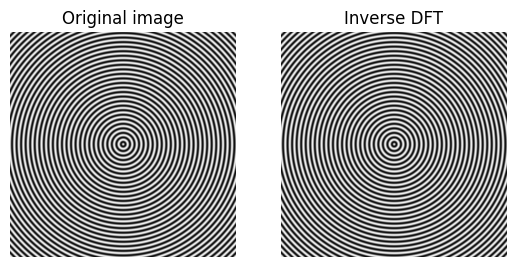

In [ ]:

f0 = 50
m=500
x = gen_img(f0,m)

x_dft = sp.fft.fft2(x)/(m**2)
# plt.imshow(np.abs(x_dft), cmap= "gray")

# x_dft = sp.fft.fftshift(x_dft)
x_idft = sp.fft.ifft2(x_dft)

plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Original image")
plt.imshow(x , cmap="gray")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Inverse DFT")
plt.imshow((x_idft).real , cmap="gray" )

In [ ]:
def get_idft(img_m, d0):
  m, n = img_m.shape
  img_dft = sp.fft.fft2(img_m)
  img_dft = sp.fft.fftshift(img_dft)
  arr = np.arange(0,int(m/2)+1)
  arr1 = np.concatenate((np.flip(arr), arr[1:-1]), axis=0)
  meshx, meshy = np.meshgrid(arr1, np.transpose(arr1))
  zs = np.sqrt(meshx**2 + meshy**2)
  img_dft[zs>d0] = 0

  img_idft = sp.fft.ifft2(img_dft)
  for i in range(m):
    for j in range(n):
      img_idft[i][j]= img_idft[i][j]*((-1)**(i+j))
  return img_idft


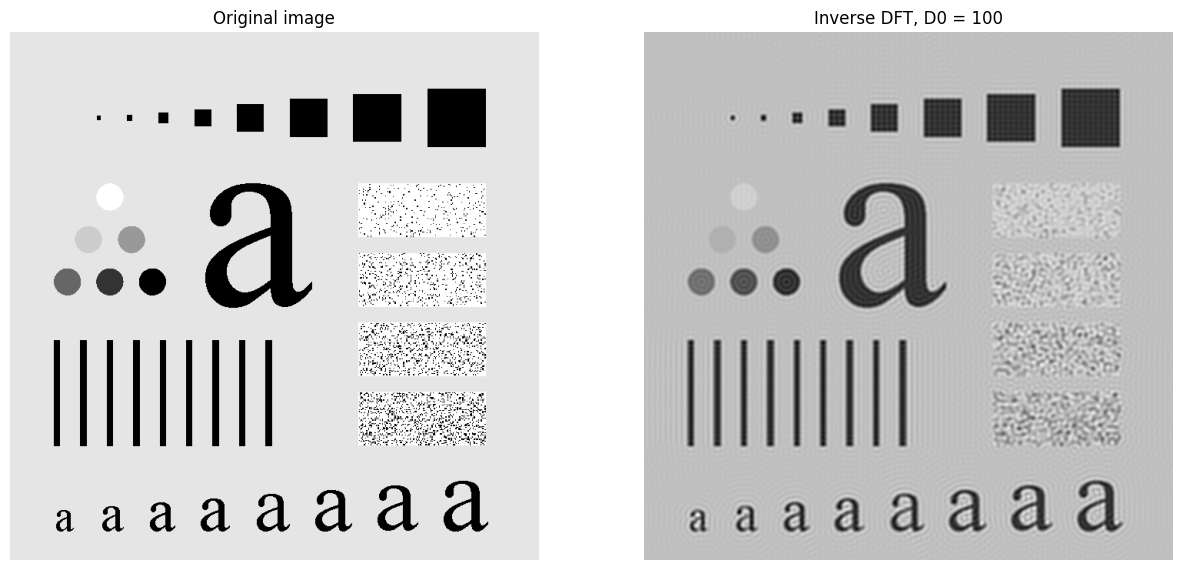

In [ ]:
img_m = np.round(plt.imread("/content/characters.tif"))
d0=100
img_idft = get_idft(img_m, d0)

plt.figure(figsize = (15,10))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Original image")
plt.imshow(img_m , cmap="gray")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Inverse DFT, D0 = "+ str(d0))
plt.imshow((img_idft).real , cmap="gray" )

In [ ]:
def get_gauss_idft(img_m, d0):
  m, n = img_m.shape
  img_dft = sp.fft.fft2(img_m)
  img_dft = sp.fft.fftshift(img_dft)
  arr = np.arange(0,int(m/2)+1)
  arr1 = np.concatenate((np.flip(arr), arr[1:-1]), axis=0)
  meshx, meshy = np.meshgrid(arr1, np.transpose(arr1))
  zs = (meshx**2 + meshy**2)
  zs = np.exp(-zs/(2*(d0**2)))
  img_dft = img_dft*zs

  img_idft = sp.fft.ifft2(img_dft)
  for i in range(m):
    for j in range(n):
      img_idft[i][j]= img_idft[i][j]*((-1)**(i+j))
  return img_idft


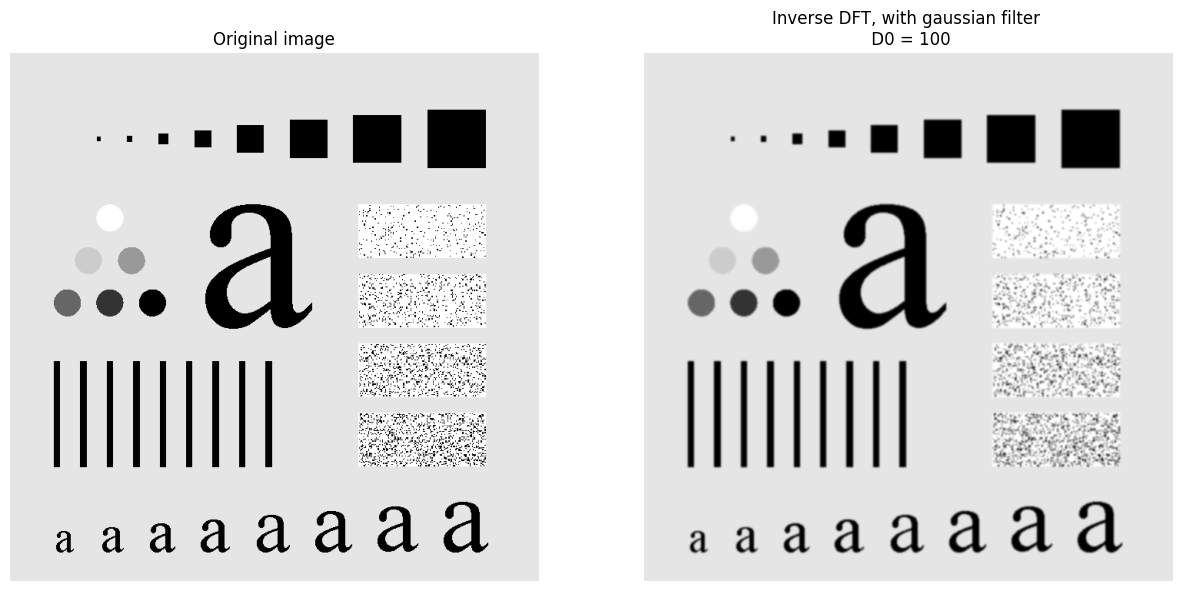

In [ ]:
img_m = np.round(plt.imread("/content/characters.tif"))
d0=100
img_idft = get_gauss_idft(img_m, d0)

plt.figure(figsize = (15,10))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Original image")
plt.imshow(img_m , cmap="gray")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Inverse DFT, with gaussian filter \n D0 = "+ str(d0))
plt.imshow(np.abs(img_idft) , cmap="gray" )

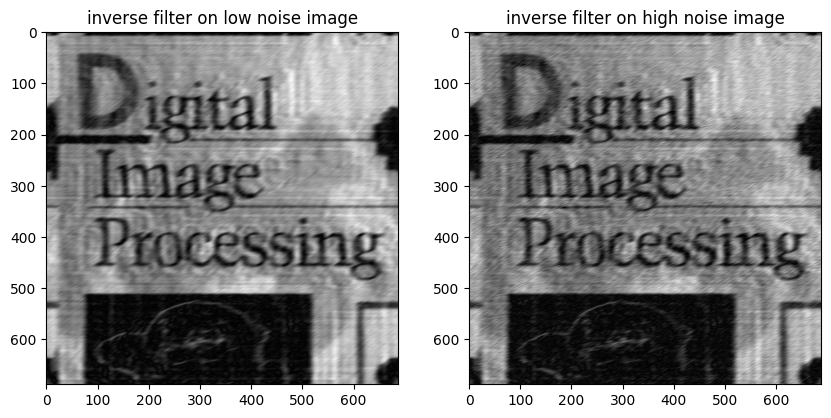

In [ ]:
kernnel = (sp.io.loadmat("BlurKernel.mat"))
h = kernnel.get("h")
hm,hn = h.shape
f = np.array(plt.imread("/content/Blurred_LowNoise.png"))
f2 = np.array(plt.imread("/content/Blurred_HighNoise.png"))
m,n = f.shape
h_sized = np.zeros((m,n), float)
for i in range(hm):
  for j in range(hn):
    h_sized[(i-int(hm/2))%m, (j-int(hn/2))%m] = h[i,j]

t=0.1
H = sp.fft.fft2(h_sized)
F = sp.fft.fft2(f)
F2 = sp.fft.fft2(f2)
inv_fil_F= np.zeros((m,n), float)
inv_fil_F= inv_fil_F.astype(complex)
inv_fil_F2= np.zeros((m,n), float)      #both images are same size in question
inv_fil_F2= inv_fil_F2.astype(complex)
for i in range(m):
  for j in range(n):
    if(abs(H[i,j])<t):
      inv_fil_F[i,j] = 0
      inv_fil_F2[i,j] = 0
    else:
      # print("f ", F[i,j]/H[i,j])
      inv_fil_F[i,j] = F[i,j]/H[i,j]
      inv_fil_F2[i,j] = F2[i,j]/H[i,j]

img_rest = sp.fft.ifft2(inv_fil_F)
img_rest2 = sp.fft.ifft2(inv_fil_F2)
plt.figure(figsize =(10,10))
plt.subplot(1,2,1)
plt.title("inverse filter on low noise image")
plt.imshow((np.abs((img_rest))), cmap="gray")
plt.subplot(1,2,2)
plt.title("inverse filter on high noise image")
plt.imshow((np.abs((img_rest2))), cmap="gray")

In [ ]:
def imgDenoising_wien(h, f, stdDev_img):
  hm,hn = h.shape
  m,n = f.shape
  h_sized = np.zeros((m,n), float)

  # changing dimentions of h filter to be equal to that of the image
  for i in range(hm):
    for j in range(hn):
      h_sized[(i-int(hm/2))%m, (j-int(hn/2))%m] = h[i,j]

  t=0.1
  H = sp.fft.fft2(h_sized)
  F = sp.fft.fft2(f)
  inv_fil = np.zeros((m,n), float)
  inv_fil = inv_fil.astype(complex)
  for i in range(m):
    for j in range(n):
      sf_m = i
      sf_n = j
      if(i>m/2):
          sf_m= m-i
      if(j>n/2):
          sf_n = n-i

      snr_inv = stdDev_img*(math.sqrt(sf_m**2+sf_n**2))/k

      k0=(np.conj(H[i,j]))/((abs(H[i,j]))**2+snr_inv)

      inv_fil[i,j] = F[i,j]*k0

  return sp.fft.ifft2(inv_fil)

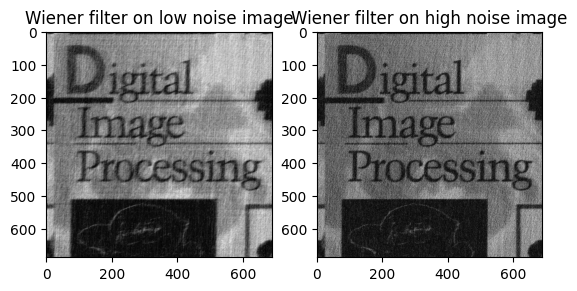

In [ ]:
f = np.array(plt.imread("/content/Blurred_HighNoise.png"))
stdDev_img = 10
k=10**5
kernnel = (sp.io.loadmat("BlurKernel.mat"))
h = kernnel.get("h")
img_rest = imgDenoising_wien(h, f, stdDev_img)

f2 = np.array(plt.imread("/content/Blurred_LowNoise.png"))
stdDev_img = 1
k=10**5
kernnel = (sp.io.loadmat("BlurKernel.mat"))
h2 = kernnel.get("h")
img_rest2 = imgDenoising_wien(h2, f2, stdDev_img)

plt.subplot(1,2,1)
plt.title("Wiener filter on low noise image")
plt.imshow((np.abs((img_rest))), cmap="gray")
plt.subplot(1,2,2)
plt.title("Wiener filter on high noise image")
plt.imshow((np.abs((img_rest2))), cmap="gray")

\begin{split}
H_{wien}(u,v)&&= \frac{H^{*}(u,v)}{|H(u,v)|^{2}+SNR^{-1}}\\
SNR &&= \frac{S_{f}(u,v)}{S_n(u,v)}
\end{split}